In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from datetime import datetime as dt
from datetime import timedelta

In [6]:
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')

/Users/jameskim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
accepted.sample(20)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1259893   18504535        NaN    16175.0      16175.0          16175.0   
2020650   85631388        NaN    15825.0      15825.0          15825.0   
748499    75367859        NaN     4575.0       4575.0           4575.0   
1385305  144595639        NaN    40000.0      40000.0          40000.0   
96695     62694795        NaN    15000.0      15000.0          15000.0   
2060117  125699029        NaN     8400.0       8400.0           8400.0   
2040606  126346222        NaN    16000.0      16000.0          16000.0   
1787261    7710104        NaN     6000.0       6000.0           6000.0   
928707   109212989        NaN    35000.0      35000.0          35000.0   
2006821   83717822        NaN    35000.0      35000.0          35000.0   
845127   137312561        NaN    16000.0      16000.0          16000.0   
1702706   98959668        NaN    12000.0      12000.0          12000.0   
1518515  134514294        NaN    37000.0      37000.0          37000.0   
1126850   34403503        NaN    10475.0      10475.0          10475.0   
985238    75943321        NaN     6300.0       6300.0           6300.0   
1540890  132506971        NaN    14400.0      14400.0          14400.0   
2142204  120819708        NaN    15000.0      15000.0          15000.0   
1542655  132770305        NaN    13200.0      13200.0          13200.0   
1844610    5234954        NaN    20000.0      20000.0          20000.0   
2032096   84433720        NaN     8800.0       8800.0           8800.0   

               term  int_rate  installment grade sub_grade  \
1259893   36 months      7.12       500.33     A        A3   
2020650   60 months     26.49       478.41     F        F2   
748499    36 months     22.45       175.79     E        E5   
1385305   60 months     10.72       864.13     B        B2   
96695     36 months      8.18       471.30     B        B1   
2060117   36 months      6.72       258.30     A        A3   
2040606   36 months      9.93       515.75     B        B2   
1787261   36 months     15.10       208.29     C        C2   
928707    36 months     11.99      1162.34     B        B5   
2006821   60 months     22.39       974.44     E        E1   
845127    36 months     11.55       528.00     B        B4   
1702706   36 months      5.32       361.38     A        A1   
1518515   36 months     10.56      1203.64     B        B3   
1126850   36 months     12.39       349.88     C        C1   
985238    36 months      5.32       189.73     A        A1   
1540890   60 months     12.61       324.78     C        C1   
2142204   36 months      7.21       464.60     A        A3   
1542655   60 months      9.43       276.78     B        B1   
1844610   36 months     14.09       684.43     B        B5   
2032096   36 months     17.99       318.10     D        D2   

                            emp_title emp_length home_ownership  annual_inc  \
1259893                    Autoworker    2 years       MORTGAGE     45000.0   
2020650             Chemical Operator    6 years       MORTGAGE     90000.0   
748499                      Caregiver    3 years           RENT     33600.0   
1385305                      Co-owner    8 years       MORTGAGE    250000.0   
96695       Technical support Manager  10+ years       MORTGAGE     95000.0   
2060117                trancit driver  10+ years           RENT     61000.0   
2040606                Senior Manager  10+ years           RENT     40000.0   
1787261              Analyst/DB Admin    6 years       MORTGAGE     42176.0   
928707                 Senior Manager  10+ years       MORTGAGE    225000.0   
2006821                   heat stress   < 1 year            OWN    100000.0   
845127         Senior Product Manager   < 1 year           RENT    125000.0   
1702706                   Maintenance    8 years       MORTGAGE     69000.0   
1518515  Business Development Manager   < 1 year            OWN    150000.0   
1126850               Department lead    8 years    

In [9]:
accepted.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [10]:
#Warm Up Question 1
#data known at time of issuance
accepted.columns[~accepted.isna().any()].tolist()

['id']

In [19]:
accepted = accepted.last_pymnt_d.fillna(0)

In [31]:
#Warm Up Question 2
#list of columns related to borrower's credit history
accepted[['all_util','bc_util','delinq_2yrs','earliest_cr_line','home_ownership','il_util','inq_last_12m','last_credit_pull_d',
'loan_amnt','open_acc','revol_bal','revol_util','tot_hi_cred_lim','total_acc','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit',
'total_rev_hi_lim']]

all_util  bc_util  delinq_2yrs earliest_cr_line home_ownership  \
0             NaN      NaN          0.0         Jan-1985           RENT   
1             NaN      NaN          0.0         Apr-1999           RENT   
2             NaN      NaN          0.0         Nov-2001           RENT   
3             NaN      NaN          0.0         Feb-1996           RENT   
4             NaN      NaN          0.0         Jan-1996           RENT   
...           ...      ...          ...              ...            ...   
1321842     103.0      NaN          0.0         Dec-1999       MORTGAGE   
1321843      59.0     45.1          0.0         Feb-1991       MORTGAGE   
1321844      51.0     66.9          7.0         Feb-1995       MORTGAGE   
1321845      73.0     77.5          0.0         Jul-1999           RENT   
1321846      84.0     80.7          0.0         Jun-1996       MORTGAGE   

         il_util  inq_last_12m last_credit_pull_d  loan_amnt  open_acc  \
0            NaN           NaN           Jan-2017     5000.0       3.0   
1            NaN           NaN           Oct-2016     2500.0       3.0   
2            NaN           NaN           Jan-2017     2400.0       2.0   
3            NaN           NaN           Apr-2016    10000.0      10.0   
4            NaN           NaN           Jan-2017     3000.0      15.0   
...          ...           ...                ...        ...       ...   
1321842    106.0           1.0           Jan-2017    24000.0       5.0   
1321843     77.0           4.0           Jan-2017    24000.0      24.0   
1321844     46.0           2.0           Jan-2017    40000.0       5.0   
1321845     78.0           1.0           Jan-2017    24000.0      10.0   
1321846     94.0           2.0           Jan-2017    14000.0       8.0   

         revol_bal  revol_util  tot_hi_cred_lim  total_acc  total_bal_ex_mort  \
0          13648.0        83.7              NaN        9.0                NaN   
1           1687.0         9.4              NaN        4.0                NaN   
2           2956.0        98.5              NaN       10.0                NaN   
3           5598.0        21.0              NaN       37.0                NaN   
4          27783.0        53.9              NaN       38.0                NaN   
...            ...         ...              ...        ...                ...   
1321842    49431.0        84.4         102517.0       54.0           104422.0   
1321843    21665.0        39.0         227883.0       58.0           140118.0   
1321844     8633.0        64.9          55970.0       37.0            28398.0   
1321845    17641.0        68.1          84664.0       31.0            62426.0   
1321846     7662.0        54.0         163804.0       22.0            44215.0   

         total_bc_limit  total_il_high_credit_limit  total_rev_hi_lim  
0                   NaN                         NaN               NaN  
1                   NaN                         NaN               NaN  
2                   NaN                         NaN               NaN  
3                   NaN                         NaN               NaN  
4                   NaN                         NaN               NaN  
...                 ...                         ...               ...  
1321842             0.0                     52017.0           50500.0  
1321843         27900.0                    172283.0           55600.0  
1321844         12300.0                     42670.0           13300.0  
1321845         20700.0                     58764.0           25900.0  
1321846          9500.0                     34169.0           14200.0  

[1321847 rows x 18 columns]

In [45]:
#Warm Up Question 2
#list of columns related to borrower's demographic information
accepted[['addr_state','zip_code']]
rejected[['State','Zip Code']]
# addr_state and zip_code for accepted and State, Zip Code for rejected

addr_state zip_code
0               AZ    860xx
1               GA    309xx
2               IL    606xx
3               CA    917xx
4               OR    972xx
...            ...      ...
1321842         AL    356xx
1321843         UT    840xx
1321844         CA    907xx
1321845         FL    334xx
1321846         TX    770xx

[1321847 rows x 2 columns]

In [51]:
#Warm Up Question 3
#columns with loan specific information (including last payments, principal left etc.)
accepted[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','issue_d',
          'loan_status','pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
          'total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','application_type']]

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000.0       5000.0           4975.0   36 months     10.65   
1           2500.0       2500.0           2500.0   60 months     15.27   
2           2400.0       2400.0           2400.0   36 months     15.96   
3          10000.0      10000.0          10000.0   36 months     13.49   
4           3000.0       3000.0           3000.0   60 months     12.69   
...            ...          ...              ...         ...       ...   
1321842    24000.0      24000.0          24000.0   60 months     12.79   
1321843    24000.0      24000.0          24000.0   60 months     10.49   
1321844    40000.0      40000.0          40000.0   60 months     10.49   
1321845    24000.0      24000.0          24000.0   60 months     14.49   
1321846    14000.0      14000.0          14000.0   60 months     14.49   

         installment grade sub_grade  
0             162.87     B        B2  
1              59.83     C        C4  
2              84.33     C        C5  
3             339.31     C        C1  
4              67.79     B        B5  
...              ...   ...       ...  
1321842       543.50     C        C1  
1321843       515.74     B        B3  
1321844       859.56     B        B3  
1321845       564.56     C        C4  
1321846       329.33     C        C4  

[1321847 rows x 8 columns]

In [64]:
accepted['issue_d'][0]

'Dec-2011'

In [69]:
#making a new column called year extracting just the year of the date issued
accepted['year']=accepted.issue_d.str.extract('(\d+)')

In [82]:
issue = accepted.groupby(['year']).count().reset_index()
issue

year      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv    term  \
0  2007     603        603        603          603              603     603   
1  2008    2393       2393       2393         2393             2393    2393   
2  2009    5281       5281       5281         5281             5281    5281   
3  2010   12537      12537      12537        12537            12537   12537   
4  2011   21721      21721      21721        21721            21721   21721   
5  2012   53367      53367      53367        53367            53367   53367   
6  2013  134814     134814     134814       134814           134814  134814   
7  2014  235629     235629     235629       235629           235629  235629   
8  2015  421095     421095     421095       421095           421095  421095   
9  2016  434407     434407     434407       434407           434407  434407   

   int_rate  installment   grade  sub_grade  emp_title  emp_length  \
0       603          603     603        603        549         603   
1      2393         2393    2393       2393       2296        2393   
2      5281         5281    5281       5281       4986        5281   
3     12537        12537   12537      12537      11793       12184   
4     21721        21721   21721      21721      20285       20962   
5     53367        53367   53367      53367      50195       51442   
6    134814       134814  134814     134814     126249      128852   
7    235629       235629  235629     235629     222393      223610   
8    421095       421095  421095     421095     397221      397278   
9    434407       434407  434407     434407     405914      406193   

   home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0             603         599                  603      603          603   
1            2393        2393                 2393     2393         2393   
2            5281        5281                 5281     5281         5281   
3           12537       12537                12537    12537        12537   
4           21721       21721                21721    21721        21721   
5           53367       53367                53367    53367        53367   
6          134814      134814               134814   134814       134814   
7          235629      235629               235629   235629       235629   
8          421095      421095               421095   421095       421095   
9          434407      434407               434407   434407       434407   

   pymnt_plan   desc  purpose   title  zip_code  addr_state     dti  \
0         603    588      603     603       603         603     603   
1        2393   2393     2393    2392      2393        2393    2393   
2        5281   5123     5281    5280      5281        5281    5281   
3       12537   8412    12537   12526     12537       12537   12537   
4       21721  12726    21721   21721     21721       21721   21721   
5       53367  32746    53367   53365     53367       53367   53367   
6      134814  48732   134814  134809    134814      134814  134814   
7      235629  15279   235629  235629    235629      235629  235629   
8      421095     45   421095  420963    421095      421095  421095   
9      434407     23   434407  411234    434407      434407  434407   

   delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0          574               574             574                     564   
1         2393              2393            2393                    1482   
2         5281              5281            5281                    1745   
3        12537             12537           12537                    4478   
4        21721             21721           21721                    7340   
5        53367             53367           53367                   21966   
6       134814            134814          134814                   58642   
7       235629            235629          235629                  119748   
8       421095            421095          421095           

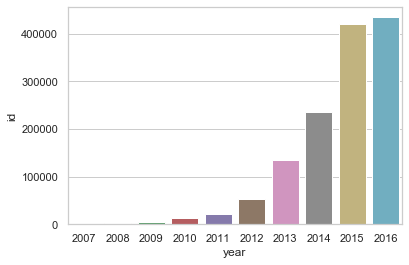

In [86]:

sns.set(style="whitegrid")
sns.barplot(x="year", y="id", data=issue)

In [99]:
grade=accepted.groupby(['grade','year']).count().reset_index()

In [100]:
grade

grade  year    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      A  2007    78         78         78           78               78   
1      A  2008   318        318        318          318              318   
2      A  2009  1203       1203       1203         1203             1203   
3      A  2010  2830       2830       2830         2830             2830   
4      A  2011  5754       5754       5754         5754             5754   
..   ...   ...   ...        ...        ...          ...              ...   
65     G  2012   261        261        261          261              261   
66     G  2013   864        864        864          864              864   
67     G  2014  1685       1685       1685         1685             1685   
68     G  2015  2167       2167       2167         2167             2167   
69     G  2016  2551       2551       2551         2551             2551   

    term  int_rate  installment  sub_grade  emp_title  emp_length  \
0     78        78           78         78         60          78   
1    318       318          318        318        293         318   
2   1203      1203         1203       1203       1145        1203   
3   2830      2830         2830       2830       2626        2729   
4   5754      5754         5754       5754       5278        5462   
..   ...       ...          ...        ...        ...         ...   
65   261       261          261        261        246         255   
66   864       864          864        864        807         837   
67  1685      1685         1685       1685       1600        1607   
68  2167      2167         2167       2167       2066        2066   
69  2551      2551         2551       2551       2384        2384   

    home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0               78          74                   78       78           78   
1              318         318                  318      318          318   
2             1203        1203                 1203     1203         1203   
3             2830        2830                 2830     2830         2830   
4             5754        5754                 5754     5754         5754   
..             ...         ...                  ...      ...          ...   
65             261         261                  261      261          261   
66             864         864                  864      864          864   
67            1685        1685                 1685     1685         1685   
68            2167        2167                 2167     2167         2167   
69            2551        2551                 2551     2551         2551   

    pymnt_plan  desc  purpose  title  zip_code  addr_state   dti  delinq_2yrs  \
0           78    73       78     78        78          78    78           67   
1          318   318      318    318       318         318   318          318   
2         1203  1159     1203   1203      1203        1203  1203         1203   
3         2830  1867     2830   2829      2830        2830  2830         2830   
4         5754  3343     5754   5754      5754        5754  5754         5754   
..         ...   ...      ...    ...       ...         ...   ...          ...   
65         261   184      261    261       261         261   261          261   
66         864   353      864    864       864         864   864          864   
67        1685    71     1685   1685      1685        1685  1685         1685   
68        2167     1     2167   2166      2167        2167  2167         2167   
69        2551     0     2551   2351      2551        2551  2551         2551   

    earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0                 67              67                      64   
1                318             318                     129   
2               1203            1203                     170   
3               2830            2830                     496   
4               5754            5754       

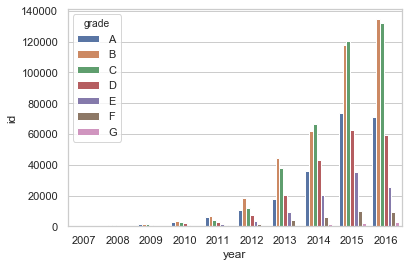

In [104]:
#there is a exponential increase in the amount of loans issued as years passes
#but regarding the grades of the loans issued, one can observe that while B,C rises every year you can see a slip in
#grade A, D, E, F, G from 2015 to 2016
sns.barplot(x="year", y="id",hue='grade', data=grade)

In [105]:
#the purposes of applying for lending club loans
accepted.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [117]:
purpo = pd.get_dummies(accepted['grade'])
purpose = pd.concat([accepted,purpo],axis=1)
purpose

id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0         1077501   1296599.0     5000.0       5000.0           4975.0   
1         1077430   1314167.0     2500.0       2500.0           2500.0   
2         1077175   1313524.0     2400.0       2400.0           2400.0   
3         1076863   1277178.0    10000.0      10000.0          10000.0   
4         1075358   1311748.0     3000.0       3000.0           3000.0   
...           ...         ...        ...          ...              ...   
1321842  89885898  96279666.0    24000.0      24000.0          24000.0   
1321843  88977788  95320713.0    24000.0      24000.0          24000.0   
1321844  88985880  95328703.0    40000.0      40000.0          40000.0   
1321845  88224441  94525153.0    24000.0      24000.0          24000.0   
1321846  88215728  94516440.0    14000.0      14000.0          14000.0   

               term  int_rate  installment grade sub_grade  \
0         36 months     10.65       162.87     B        B2   
1         60 months     15.27        59.83     C        C4   
2         36 months     15.96        84.33     C        C5   
3         36 months     13.49       339.31     C        C1   
4         60 months     12.69        67.79     B        B5   
...             ...       ...          ...   ...       ...   
1321842   60 months     12.79       543.50     C        C1   
1321843   60 months     10.49       515.74     B        B3   
1321844   60 months     10.49       859.56     B        B3   
1321845   60 months     14.49       564.56     C        C4   
1321846   60 months     14.49       329.33     C        C4   

                           emp_title emp_length home_ownership  annual_inc  \
0                                NaN  10+ years           RENT     24000.0   
1                              Ryder   < 1 year           RENT     30000.0   
2                                NaN  10+ years           RENT     12252.0   
3                AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4           University Medical Group     1 year           RENT     80000.0   
...                              ...        ...            ...         ...   
1321842                Unit Operator    7 years       MORTGAGE     95000.0   
1321843       Database Administrator  10+ years       MORTGAGE    108000.0   
1321844              Vice President     9 years       MORTGAGE    227000.0   
1321845              Program Manager    6 years           RENT    110000.0   
1321846  Customer Service Technician  10+ years       MORTGAGE     95000.0   

        verification_status   issue_d  loan_status pymnt_plan  \
0                  Verified  Dec-2011   Fully Paid          n   
1           Source Verified  Dec-2011  Charged Off          n   
2              Not Verified  Dec-2011   Fully Paid          n   
3           Source Verified  Dec-2011   Fully Paid          n   
4           Source Verified  Dec-2011   Fully Paid          n   
...                     ...       ...          ...        ...   
1321842     Source Verified  Oct-2016      Current          n   
1321843        Not Verified  Oct-2016      Current          n   
1321844            Verified  Oct-2016      Current          n   
1321845        Not Verified  Oct-2016      Current          n   
1321846            Verified  Oct-2016      Current          n   

                                                      desc  \
0          Borrower added on 12/22/11 > I need to upgra...   
1          Borrower added on 12/22/11 > I plan to use t...   
2                                                      NaN   
3          Borrower added on 12/21/11 > to pay for prop...   
4          Borrower added on 12/21/11 > I plan on combi...   
...                                                    ...   
1321842                                                NaN   
1321843                                                NaN   
1321844                                                NaN   
1321845                                    

In [134]:
purp = accepted.groupby(['purpose','grade']).count().reset_index()

In [135]:
purp

purpose grade    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       car     A  3458       3458       3458         3458             3458   
1       car     B  4300       4300       4300         4300             4300   
2       car     C  3431       3431       3431         3431             3431   
3       car     D  1587       1587       1587         1587             1587   
4       car     E   648        648        648          648              648   
..      ...   ...   ...        ...        ...          ...              ...   
93  wedding     C   492        492        492          492              492   
94  wedding     D   506        506        506          506              506   
95  wedding     E   220        220        220          220              220   
96  wedding     F   103        103        103          103              103   
97  wedding     G    26         26         26           26               26   

    term  int_rate  installment  sub_grade  emp_title  emp_length  \
0   3458      3458         3458       3458       3246        3274   
1   4300      4300         4300       4300       4019        4058   
2   3431      3431         3431       3431       3246        3267   
3   1587      1587         1587       1587       1486        1496   
4    648       648          648        648        605         611   
..   ...       ...          ...        ...        ...         ...   
93   492       492          492        492        481         488   
94   506       506          506        506        487         499   
95   220       220          220        220        213         213   
96   103       103          103        103        103         103   
97    26        26           26         26         26          26   

    home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0             3458        3458                 3458     3458         3458   
1             4300        4300                 4300     4300         4300   
2             3431        3431                 3431     3431         3431   
3             1587        1587                 1587     1587         1587   
4              648         648                  648      648          648   
..             ...         ...                  ...      ...          ...   
93             492         492                  492      492          492   
94             506         506                  506      506          506   
95             220         220                  220      220          220   
96             103         103                  103      103          103   
97              26          26                   26       26           26   

    pymnt_plan  desc  title  zip_code  addr_state   dti  delinq_2yrs  \
0         3458   764   3435      3458        3458  3458         3458   
1         4300   625   4235      4300        4300  4300         4300   
2         3431   358   3375      3431        3431  3431         3431   
3         1587   184   1556      1587        1587  1587         1587   
4          648    66    633       648         648   648          648   
..         ...   ...    ...       ...         ...   ...          ...   
93         492   283    492       492         492   492          492   
94         506   214    506       506         506   506          506   
95         220   101    220       220         220   220          220   
96         103    47    103       103         103   103          103   
97          26    14     26        26          26    26           26   

    earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0               3458            3458                    1197   
1               4300            4300                    2174   
2               3431            3431                    1849   
3               1587            1587                     832   
4                648             648                     368   
..               ...             ...                

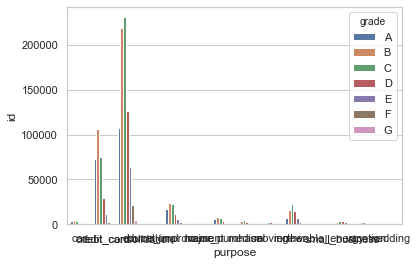

In [136]:
sns.barplot(x="purpose",y='id',hue='grade', data=purp)

In [177]:
accepted['issue_date'] = pd.to_datetime(accepted['issue_d'])
accepted['issue_d'] = accepted['issue_date'].apply(lambda x: str(x)[:7])
accepted['last_pymnt_date'] = pd.to_datetime(accepted['last_pymnt_d'])
accepted['paid_months'] = (accepted['last_pymnt_date'].dt.year - accepted['issue_date'].dt.year) * 12 + accepted['last_pymnt_date'].dt.month - accepted['issue_date'].dt.month


0          37.0
1          16.0
2          30.0
3          37.0
4          61.0
           ... 
1321842     3.0
1321843     3.0
1321844     3.0
1321845     3.0
1321846     3.0
Name: paid_months, Length: 1321847, dtype: float64

In [183]:
accepted[['paid_months']] = accepted[['paid_months']].fillna(value=0)
# acc_paid = accepted.loc[accepted['loan_status']=='']

In [187]:
def acc_paid (row):
    if row['loan_status']=='Fully Paid':
        return 1
    if row['loan_status'] != 'Fully Paid':
        return 0

In [188]:
accepted['fully_paid'] = accepted.apply (lambda row: acc_paid(row), axis=1)


In [189]:
accepted.sample(10)

id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
100611   6738856   8341178.0    25000.0      25000.0          25000.0   
955509  72003650  77228409.0    16000.0      16000.0          16000.0   
983123  70772408  75846173.0    18000.0      18000.0          18000.0   
132400   5595328   6977553.0    12000.0      12000.0          12000.0   
177618   2644732   3186895.0    35000.0      35000.0          35000.0   
991425  69643867  74650613.0    30000.0      30000.0          30000.0   
89488    7315165   8957316.0     9950.0       9950.0           9950.0   
381718  59412278  63346030.0    15000.0      15000.0          15000.0   
563088  44144318  47161334.0     8400.0       8400.0           8400.0   
394994  58533782  62374546.0     6000.0       6000.0           6000.0   

              term  int_rate  installment grade sub_grade  \
100611   60 months     22.20       693.32     E        E4   
955509   36 months      6.49       490.32     A        A2   
983123   36 months      9.16       573.74     B        B2   
132400   36 months      7.62       373.94     A        A3   
177618   60 months     21.00       946.87     E        E2   
991425   60 months     19.48       786.17     E        E2   
89488    36 months     15.61       347.90     C        C3   
381718   60 months     17.86       379.76     D        D5   
563088   36 months     11.53       277.12     B        B5   
394994   36 months     11.53       197.95     B        B5   

                        emp_title emp_length home_ownership  annual_inc  \
100611        NABORS WELL SERVICE  10+ years           RENT    150000.0   
955509     Lead Software Engineer    5 years           RENT     75000.0   
983123                  President  10+ years       MORTGAGE    210000.0   
132400     Keller Williams Realty    4 years            OWN    105000.0   
177618      Explorer Pipeline Co.  10+ years            OWN     90000.0   
991425                        NaN        NaN       MORTGAGE     65000.0   
89488   American Family insurance    9 years       MORTGAGE     30000.0   
381718  Animal Control Officer II    9 years           RENT     50000.0   
563088      Lead Database Analyst    9 years       MORTGAGE     85000.0   
394994                        NaN        NaN       MORTGAGE     32000.0   

       verification_status  issue_d         loan_status pymnt_plan  \
100611     Source Verified  2013-08  Late (31-120 days)          n   
955509            Verified  2016-02             Current          n   
983123        Not Verified  2016-02             Current          n   
132400        Not Verified  2013-06          Fully Paid          n   
177618     Source Verified  2012-12          Fully Paid          n   
991425            Verified  2016-01             Current          n   
89488             Verified  2013-09          Fully Paid          n   
381718            Verified  2015-09             Current          n   
563088        Not Verified  2015-04             Current          n   
394994     Source Verified  2015-09          Fully Paid          n   

                                                     desc             purpose  \
100611                                                NaN  debt_consolidation   
955509                                                NaN         credit_card   
983123                                                NaN  debt_consolidation   
132400                                                NaN  debt_consolidation   
177618                                                NaN  debt_consolidation   
991425                                                NaN  debt_consolidation   
89488     Borrower added on 09/13/13 > i want to pay c...               other   
381718                                                NaN  debt_consolidation   
563088                                                NaN  debt_consolidation   
394994                                                NaN  debt_consolidation   

                          title zip_code addr_sta

In [184]:
kmf = KaplanMeierFitter()


In [190]:
T = accepted['paid_months']
E = accepted['fully_paid']

In [191]:
kmf.fit(T,E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1.32185e+06 total observations, 925643 right-censored observations>

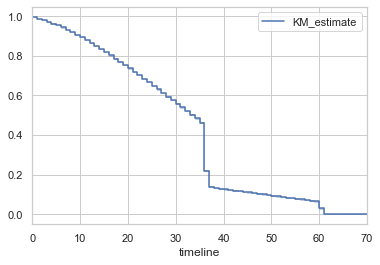

In [192]:
kmf.plot()

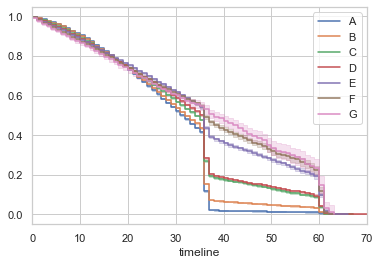

In [210]:
groups = sorted(accepted.grade.unique())
for group in groups:
    X = accepted.loc[accepted['grade']== group]['fully_paid']
    Y = accepted.loc[accepted['grade']== group]['paid_months']
    kmf.fit(Y, X, label=group)

    kmf.plot()

In [ ]:
#to handle the data use stratified sampling to split up the ddata
#cut data into buckets (dates)
#that way i preserve equal amount of samples in each month